In [113]:
# inline plotting instead of popping out
%matplotlib inline

import os
import numpy as np # numpy 1.26.0
import pandas as pd # pandas 2.1.1
import matplotlib.pyplot as plt # matplotlib 3.8.0
import seaborn as sns # seaborn 0.13.0
from sklearn.preprocessing import StandardScaler # scikit-learn 1.3.1

In [114]:
print("numpy version: ", np.__version__)
print("pandas version: ", pd.__version__)
import matplotlib as mplb
print("matplotlib version: ", mplb.__version__)
print("seaborn version: ",sns.__version__)
import sklearn as skl
print("sklearn version: ",skl.__version__)

numpy version:  1.24.4
pandas version:  2.0.3
matplotlib version:  3.7.3
seaborn version:  0.13.0
sklearn version:  1.3.1


## - Exploratory Data Analysis

<font color="red">Exploratory Data Analysis (EDA)</font> is an important and recommended <font color="red">first step</font> of Machine Learning (prior to the training of a machine learning model that are more commonly seen in research papers). EDA performs the exploration and exploitation steps iteratively. In the <font color="red">exploration step</font>, you <font color="red">"explore" the data</font>, usually by <font color="red">visualizing</font> them in different ways, to discover some characteristics of data. Then, in the <font color="red">exploitation</font> step, you use the <font color="red">identified characteristics</font> to figure out the next things to explore. You then repeat the above two steps until you are satisfied with what you have learned from the data. <font color="red">Data visualization</font> plays an important role in EDA.  Next, we use the [Wine](https://archive.ics.uci.edu/dataset/109/wine) dataset from the UCI machine learning repository as an example dataset and show some common and useful plots.

### Visualizing the Important Characteristics of a Dataset

Let's download the [Wine](https://archive.ics.uci.edu/dataset/109/wine) dataset using [Pandas](https://pandas.pydata.org/) first:

In [115]:
# 第一行沒有列名，所以header給None
df = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',
    header = None)

# 給列名
df.columns = [
    'Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
    'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
    'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
    'Proline'
]

# x中為不包含class label列的dataset (training data)
X = df.drop(labels='Class label', axis=1)
# y中為class label列的dataset (test data)
y = df['Class label']

df.head()

Class label  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0            1    14.23        1.71  2.43               15.6        127   
1            1    13.20        1.78  2.14               11.2        100   
2            1    13.16        2.36  2.67               18.6        101   
3            1    14.37        1.95  2.50               16.8        113   
4            1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0             5.64  1.04                          3.92     1065  
1             4.38  1.05                          3.40     1050  
2             5.68  1.03                          3.17     1185  
3             7.80  0.86                          3.45     1480  
4             4.32  1.04                          2.93      735

As we can see, showing data row-by-row with their column names does not help us get the "big picture" and characteristics of data.

NOTE: pd.read_csv() function returns [a pandas.DataFre](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) e object. Pandas Dataframe is an useful "two-dimensional size-mutable, potentially heterogeneous tabular data structure with labeled axes".

### Pairwise Joint Distributions

We can instead see the joint distribution of any pair of columns/attributes/variables/features by using the pairplot function offered by [Seaborn](https://stanford.edu/~mwaskom/software/seaborn/), which is based on [Matplotlib](http://matplotlib.org/):

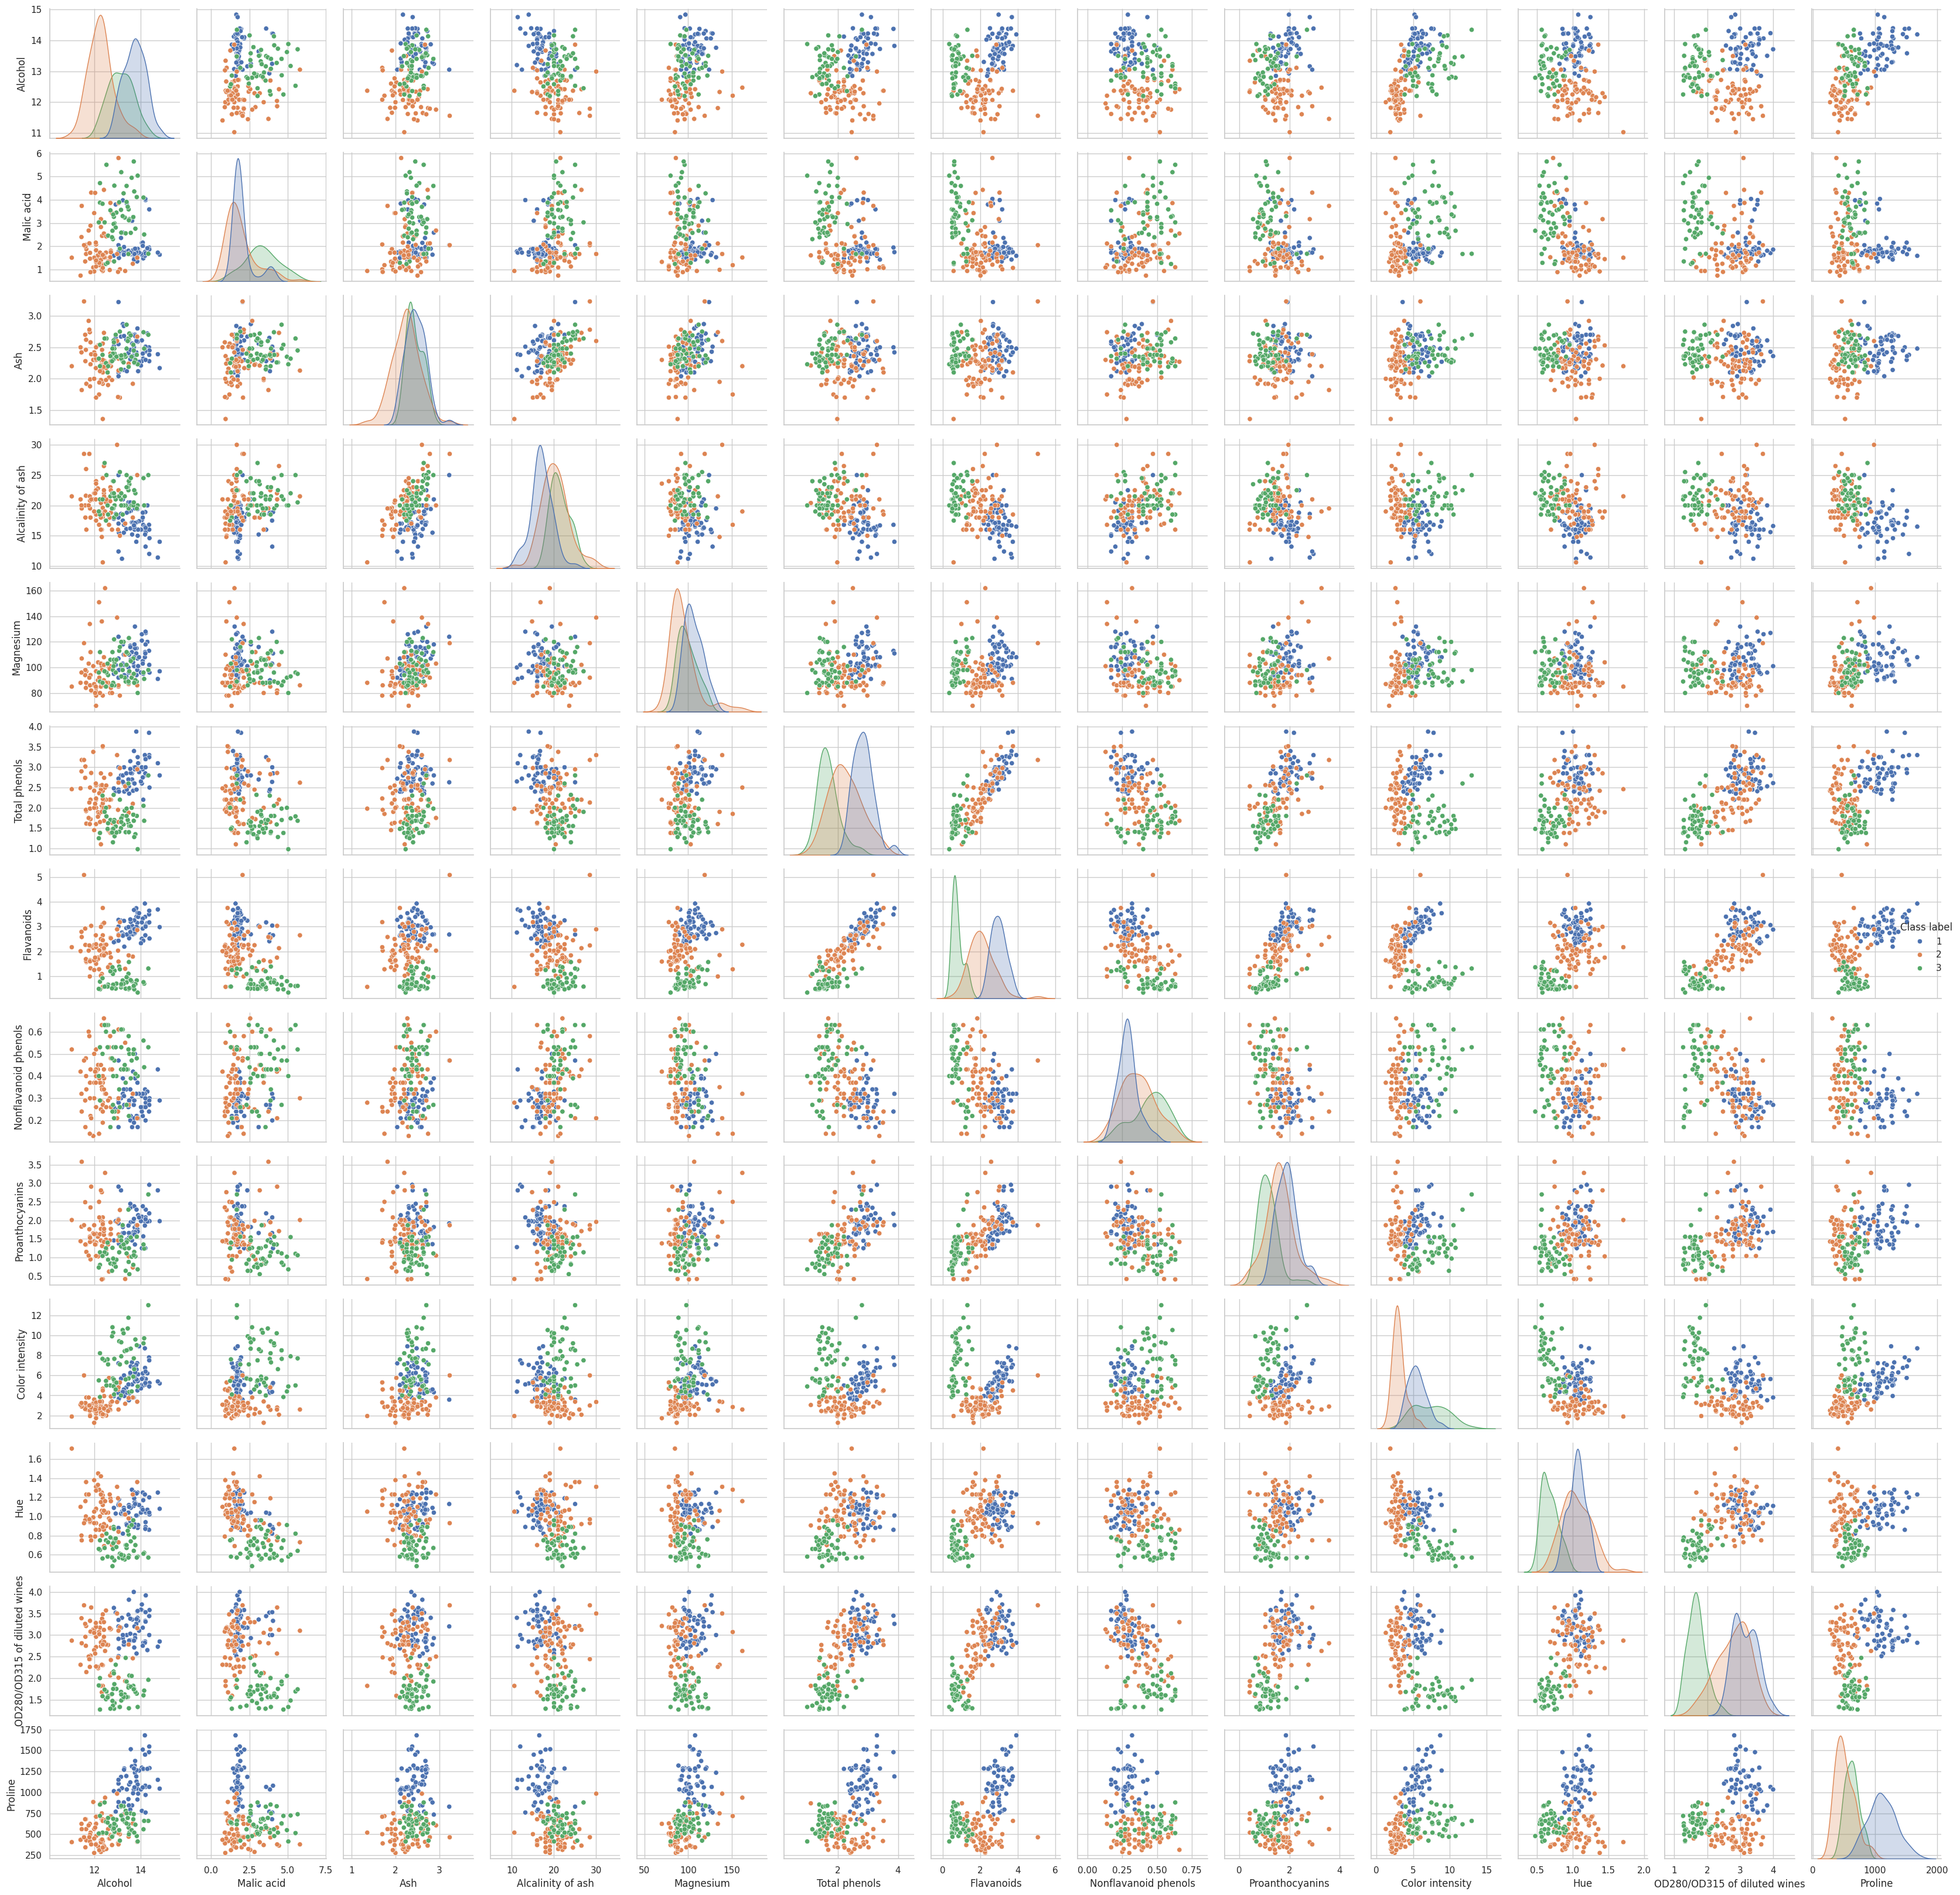

In [116]:
sns.set(style='whitegrid', context='notebook')

sns.pairplot(df, vars=df.columns[1:], hue="Class label", height=2.5, palette=sns.color_palette('deep', df['Class label'].unique().size))
plt.tight_layout()

if not os.path.exists('./output'):
  os.makedirs('./output')
    
plt.savefig('./output/fig-wine-scatter.png', dpi=300)
plt.show()

這段代碼使用 Seaborn 库和 Matplotlib 库來創建一個散點矩陣圖（pairplot），並將圖形保存為一個 PNG 文件。以下是代碼的逐行解釋：

1. `sns.set(style='whitegrid', context='notebook')`: 這行代碼配置了 Seaborn 的樣式和上下文。它將圖形樣式設置為 `'whitegrid'`，並將上下文設置為 `'notebook'`，以適應 Jupyter Notebook 的環境。

2. `sns.pairplot(df, vars=df.columns[1:], hue="Class label", height=2.5, palette=sns.color_palette('deep', df['Class label'].unique().size))`: 這行代碼創建了一個散點矩陣圖（pairplot）。具體來說：

   - `df` 是包含數據的 DataFrame。
   - `vars=df.columns[1:]` 指定了要繪製的列，它們是除了第一列（通常是類別標籤）之外的所有列。
   - `hue="Class label"` 通過顏色對數據進行分類，這意味著不同的類別標籤將以不同的顏色顯示。
   - `height=2.5` 設置圖形的高度。
   - `palette=sns.color_palette('deep', df['Class label'].unique().size)` 指定了顏色調色板，以便根據類別標籤的數量來選擇顏色。

3. `plt.tight_layout()`: 這行代碼用於自動調整圖形的布局，以確保在保存時沒有重疊。

4. `if not os.path.exists('./output'):` 和 `os.makedirs('./output')`：這兩行代碼檢查是否存在名為 "output" 的目錄，如果不存在則創建它。這是為了確保保存圖形的目標目錄存在。

5. `plt.savefig('./output/fig-wine-scatter.png', dpi=300)`: 這行代碼將圖形保存為 PNG 文件。它指定了保存的文件路徑為 "./output/fig-wine-scatter.png"，並且設置了分辨率為 300 DPI。

6. `plt.show()`: 最後一行代碼顯示圖形，如果你在 Jupyter Notebook 中運行這段代碼，圖形將顯示在輸出儲存格中。

這段代碼的主要目的是創建一個散點矩陣圖，以探索數據的分佈和關係，並將圖形保存到 "./output/fig-wine-scatter.png" 文件中。如果 "./output" 目錄不存在，它會自動創建。你可以根據需要修改保存路徑和文件名。

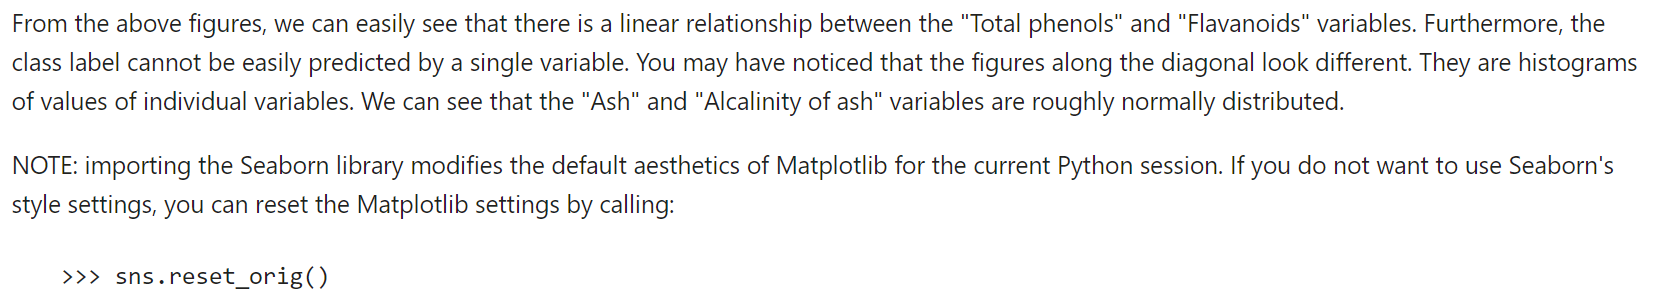

這個注意事項提到，匯入Seaborn庫會修改當前Python會話中Matplotlib的默認美學設置。如果你不想使用Seaborn的風格設置，你可以通過調用以下方法來重置Matplotlib的設置：

```python
sns.reset_orig()
```

這會將Matplotlib的風格和設置恢復到默認值，不再使用Seaborn的風格。這在某些情況下很有用，特別是如果你之後想要自定義Matplotlib的風格或需要與其他庫一起使用Matplotlib而不希望受到Seaborn的影響。

重置Matplotlib後，你可以根據需要自定義Matplotlib的風格和繪圖設置。

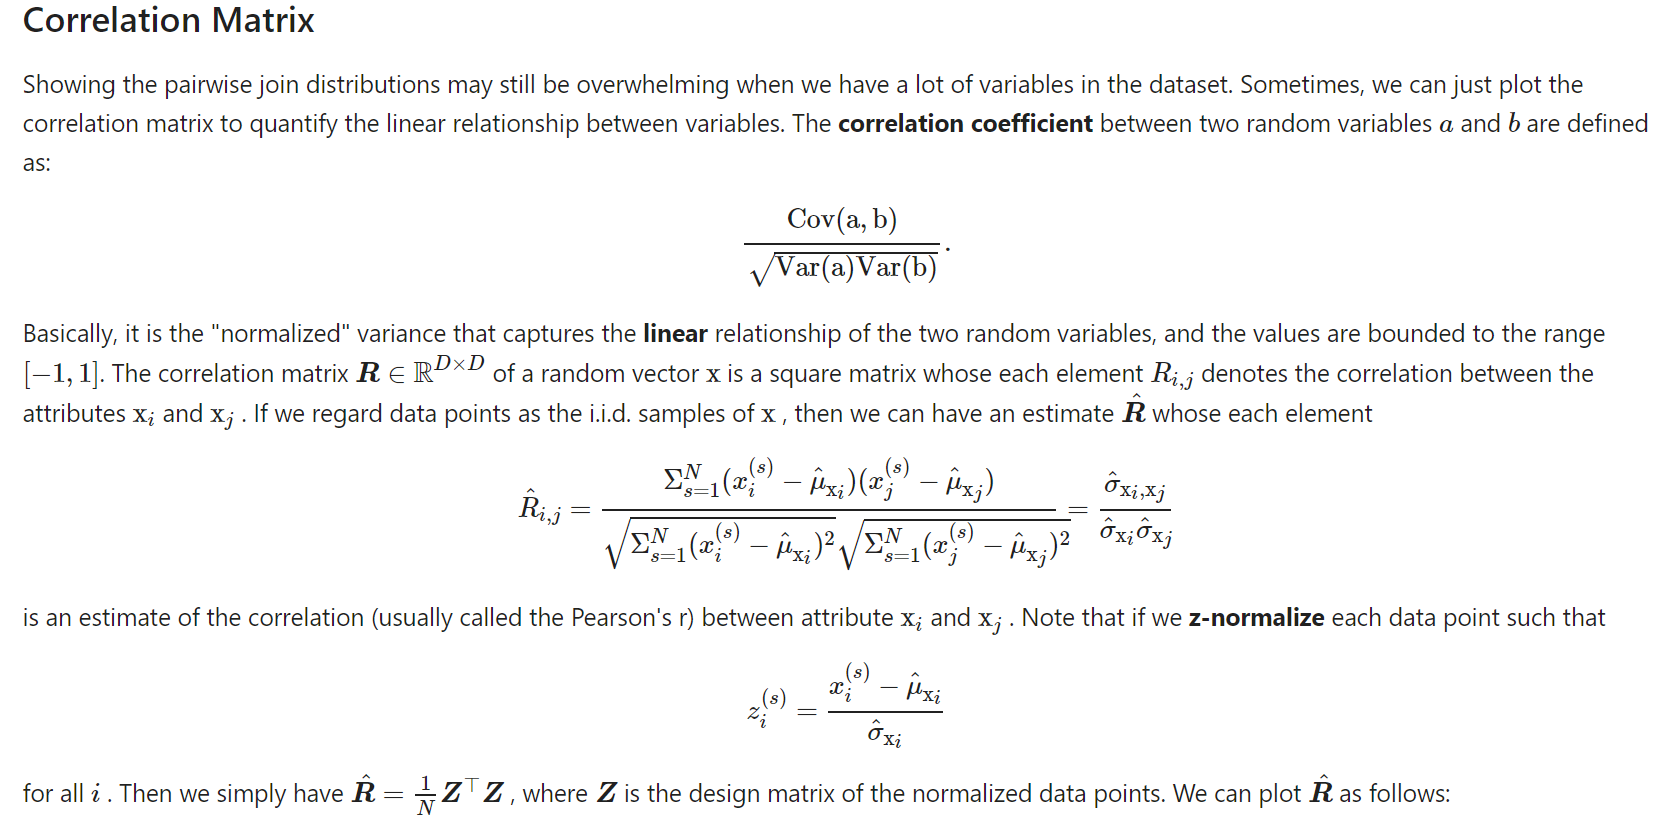

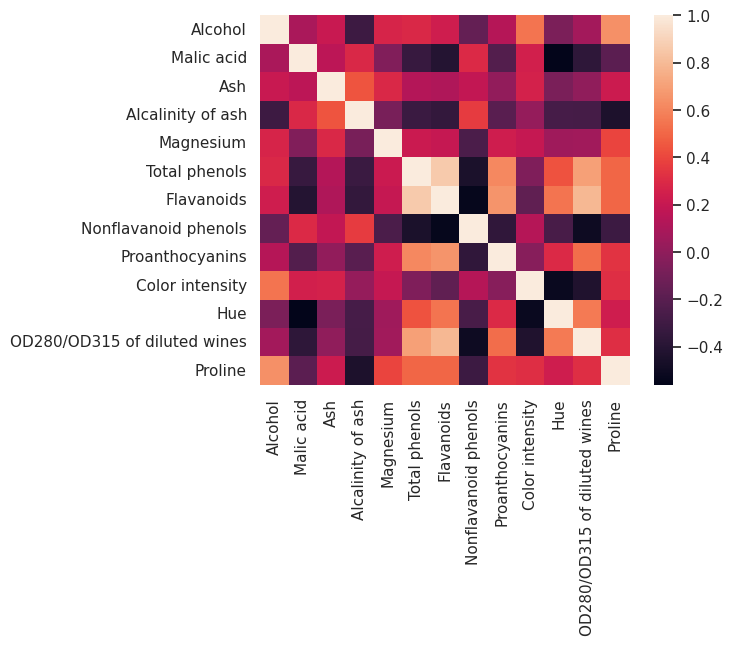

<Figure size 1000x800 with 0 Axes>

In [117]:
# Z-normalize data
sc = StandardScaler()
Z = sc.fit_transform(X)
# Estimate the correlation matrix
R = np.dot(Z.T, Z) / df.shape[0]

sns.set(font_scale=1.0)

# 傳回列標籤
ticklabels = [s for s in X.columns]

hm = sns.heatmap(
    R,
    cbar=True,
    square=True,
    yticklabels=ticklabels,
    xticklabels=ticklabels
)

plt.figure(figsize=(10, 8))
plt.tight_layout()
plt.savefig('./output/fig-wine-corr.png', dpi = 300)
plt.show()

sns.reset_orig()

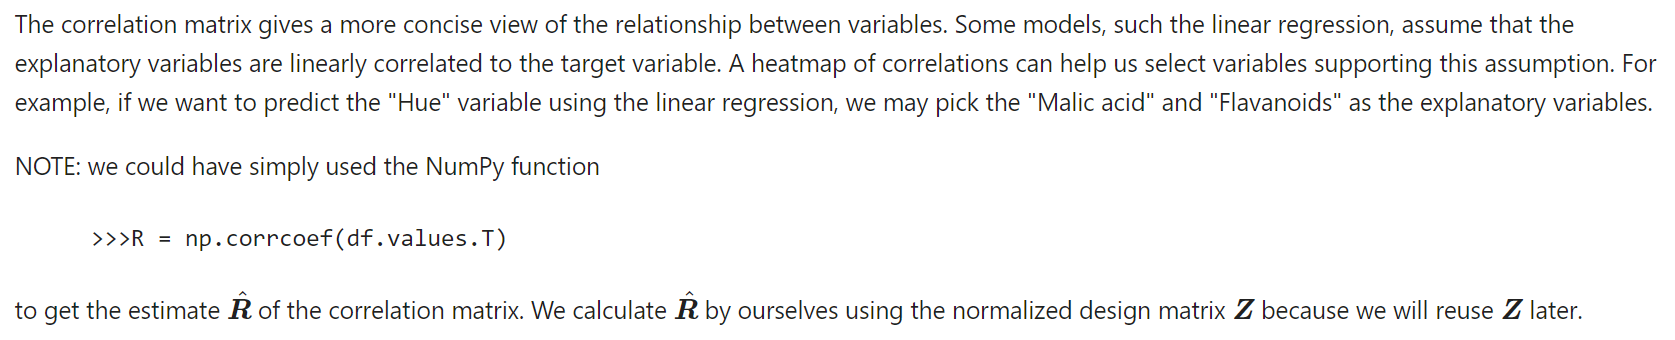

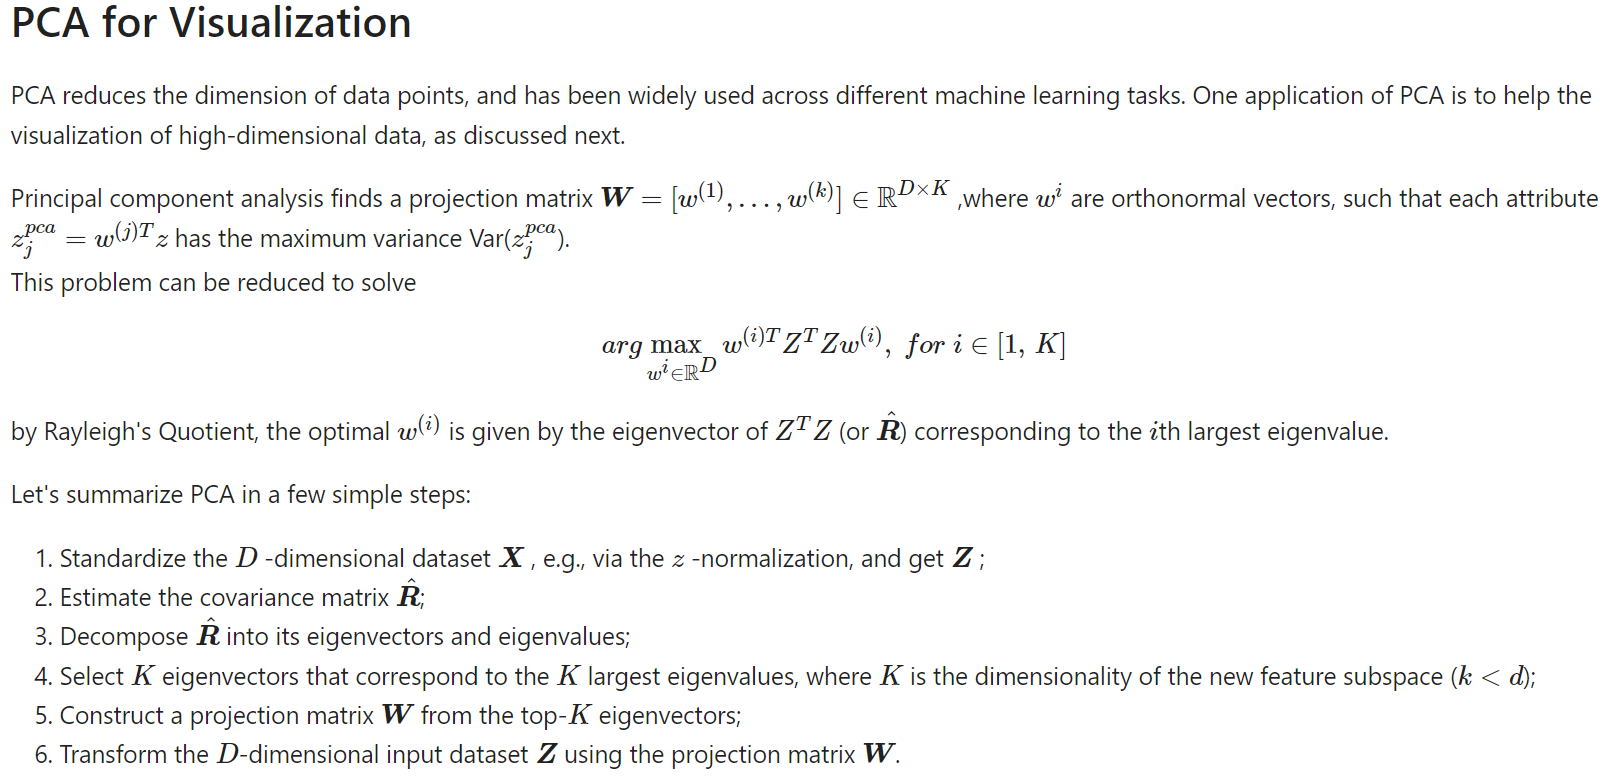

### Eigendecomposition

Since we already have 
$Z$ and $\hat{R}$ from the above. We can begin from the step 3:

In [118]:
eigen_vals, eigen_vecs = np.linalg.eigh(R)
print('\nEigenvalues: \n%s' % eigen_vals)


Eigenvalues: 
[0.10337794 0.16877023 0.22578864 0.25090248 0.28887994 0.34849736
 0.55102831 0.64165703 0.85322818 0.91897392 1.44607197 2.49697373
 4.70585025]


NOTE: there is an `np.linalg.eig()` function in NumPy that also eigendecomposes matrices. The difference is that np.linalg.eigh() is optimized for symmetric matrices whose eigenvalues are always real numbers. The numerically less stable np.linalg.eig() can decompose non-symmetric square matrices and returns complex eigenvalues.

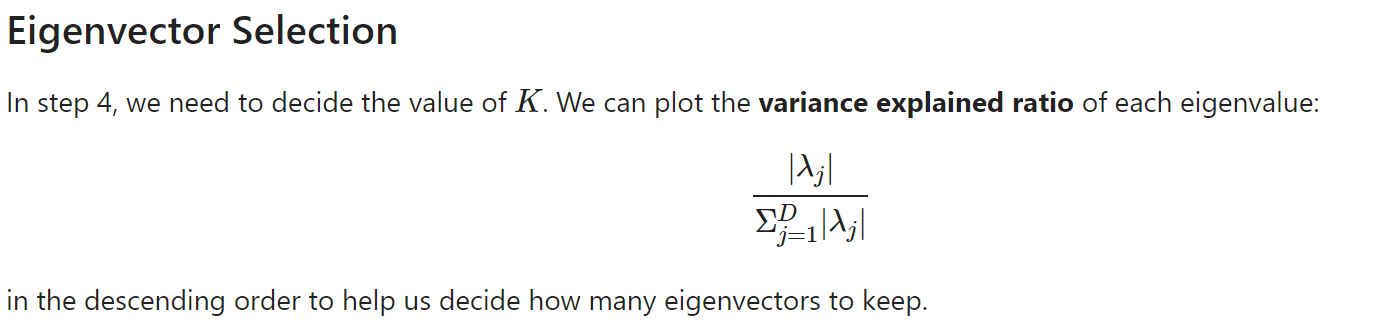

The resulting plot indicates that the first principal component alone accounts for 40 percent of the variance. Also, we can see that the first two principal components combined explain almost 60 percent of the variance in the data. Next, we collect the two eigenvectors that correspond to the two largest values to capture about 60 percent of the variance in this dataset. Note that we only chose two eigenvectors for the purpose of illustration, since we are going to plot the data via a two-dimensional scatter plot later in this subsection. In practice, the number of principal components can be determined by other reasons, such as the trade-off between computational efficiency and performance.

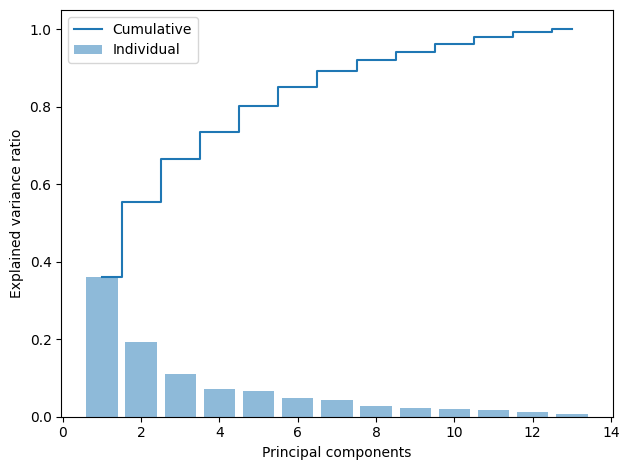

In [119]:
tot = sum(np.abs(eigen_vals))
var_exp = [(i / tot) for i in sorted(np.abs(eigen_vals), reverse=True)]
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(1, eigen_vals.size + 1), var_exp, alpha=0.5, align='center',
        label='Individual')
plt.step(range(1, eigen_vals.size + 1), cum_var_exp, where='mid',
         label='Cumulative')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('./output/fig-pca-var-exp.png', dpi=300)
plt.show()

```python=
arr = np.array([1, 2, 3, 4, 5])
cumulative_sum = np.cumsum(arr)  # [1, 3, 6, 10, 15]
total_sum = np.sum(arr)  # 15
```

### Feature Transformation
Let's now proceed with the last three steps to project the standardized Wine dataset onto the new principal component axes. We start by sorting the eigenpairs by decreasing order of the eigenvalues:

In [120]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(reverse=True)

`eigen_vecs[:,i]` 是特徵向量矩陣 `eigen_vecs` 中的第 `i` 列，表示第 `i` 個特徵向量。這是一種常見的索引操作，用於訪問矩陣中的特定列。

在主成分分析（PCA）中，特徵向量表示了數據的主成分方向，每個特徵向量對應一個特徵值。通過 `eigen_vecs[:,i]`，您可以獲取第 `i` 個主成分的特徵向量，以便後續進行數據降維或其他分析操作。

特別地，`[:,i]` 意味著選擇矩陣的所有行（`:`）和第 `i` 列，因此返回的是一個列向量，其中包含了第 `i` 個主成分的特徵向量。這是一種常見的操作，用於提取特徵向量以進行進一步的計算或分析。

Next, we pick the first two eigenvectors and form the project matrix $W$:

In [121]:
W = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
print('Projection matrix W:\n', W)

Projection matrix W:
 [[-0.1443294  -0.48365155]
 [ 0.24518758 -0.22493093]
 [ 0.00205106 -0.31606881]
 [ 0.23932041  0.0105905 ]
 [-0.14199204 -0.299634  ]
 [-0.39466085 -0.06503951]
 [-0.4229343   0.00335981]
 [ 0.2985331  -0.02877949]
 [-0.31342949 -0.03930172]
 [ 0.0886167  -0.52999567]
 [-0.29671456  0.27923515]
 [-0.37616741  0.16449619]
 [-0.28675223 -0.36490283]]


Finally, we can obtain the compressed dataset by:<br>
<center>$Z^{PCA}$ = $ZW$<br></center>
and visualize it using:

(178, 13)
(13, 2)
(178, 2)


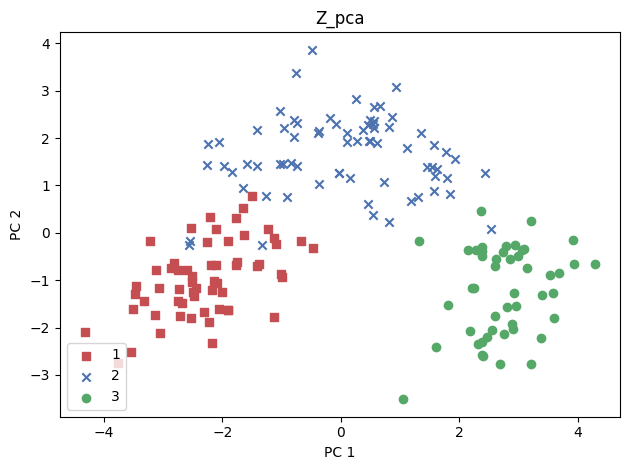

In [122]:
Z_pca = Z.dot(W)
print(Z.shape)
print(W.shape)
print(Z_pca.shape)

colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y.values), colors, markers):
    plt.scatter(Z_pca[y.values==l, 0], 
                Z_pca[y.values==l, 1], 
                c=c, label=l, marker=m)

plt.title('Z_pca')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.savefig('./output/fig-pca-z.png', dpi=300)
plt.show()

As we can see, the data is more spread along the $x$-axis corresponding to the first principal component than the $y$-axis (second principal component), which is consistent with the explained variance ratio plot that we created in the previous subsection. PCA may save us from examining a lot of pairwise distributions (as shown in the previous section) when the original data dimension $D$ is high. For example, if we see that the data points with different labels can be separated in the space of PCA, then we can simply choose a linear classifier to do the classification.

Finally, let's save the compressed dataset for future use.

In [123]:
np.save('./output/Z_pca.npy', Z_pca)

## <center>Assignment</center>

Here's a generated dataset, with 3 classes and 15 attributes. Your goal is to reduce data dimension to 2 and 3, and then plot 2-D and 3-D visualization on the compressed data, respectively.

In [128]:
"""
# import libs, load data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
"""

df_load = pd.read_csv('https://nthu-datalab.github.io/ml/labs/02_EDA_PCA/gen_dataset.csv')

X_load = df_load.drop(labels='Class label', axis=1)
Y_load = df_load['Class label']

df_load.head(20)

Class label        a1        a2        a3        a4        a5        a6  \
0           2.0 -0.016488 -1.310538 -1.552489 -0.785475  1.548429  0.476687   
1           0.0 -0.844201 -1.235142 -0.624408  1.502470 -0.079536  1.482053   
2           0.0 -0.181053  0.039422 -0.307827  0.162256 -1.283705  0.541288   
3           2.0 -0.423555 -1.598754  1.597206 -0.239330  1.443564  2.657538   
4           2.0 -0.499408 -0.814229 -0.178777 -1.757823  0.678134  3.552825   
5           0.0 -0.428008 -1.510844 -0.520602  1.016787  0.504389  1.587009   
6           0.0 -0.364915 -2.544254 -1.024980 -0.777106  0.592821  2.148684   
7           0.0  0.615811  0.682068 -0.950626  0.443415 -2.080509  0.968747   
8           2.0 -0.132766 -1.872343 -0.341152 -0.576811  2.023353  1.399172   
9           2.0 -0.196609 -0.567812 -0.443304  1.953086  1.289489  1.113541   
10          2.0  0.885614  0.827935  0.228152 -0.758956  0.343938  0.034835   
11          1.0 -1.400689  2.360627  1.079792  0.993940 -1.284062 -1.511916   
12          0.0 -1.027293  0.969854 -0.817602 -0.150895 -2.026934  1.306598   
13          2.0  0.756182 -1.866111 -0.124258  0.206065  1.513977  2.512618   
14          1.0  0.713122  1.824880  0.799309 -0.858467 -0.512594 -1.367538   
15          2.0 -0.336364 -0.915905  0.263205  0.312422  1.328993  0.022392   
16          2.0  1.487149  1.588377 -0.415803 -0.341682 -0.070361 -1.370795   
17          0.0 -1.707551  1.230936 -0.728147 -0.369846 -2.189768  0.868182   
18          0.0 -1.351523 -0.643847 -0.041254 -0.171924 -1.213273  1.844970   
19          1.0 -1.335413 -1.279968  0.043557  1.106521 -0.091806  0.992708   

          a7        a8        a9       a10       a11       a12       a13  \
0   1.090010 -0.351870 -0.000855 -1.932941  0.499177  0.149137 -0.640413   
1   1.178544 -1.150090 -1.040124 -1.041435  0.281037 -0.283710 -1.176802   
2   0.019113 -0.470718 -1.045754  0.983150 -0.121205 -0.189225 -0.539178   
3   1.824393 -1.809287  1.058634 -4.058539  0.255908 -0.952422 -0.315551   
4   1.483069 -2.341943  2.155062 -4.380612 -0.239352 -1.730919  0.586125   
5   1.427628 -1.201267 -0.729711 -1.771873  0.387968 -0.282446 -1.152113   
6   2.252736 -1.711657 -1.934957 -2.099255  0.738557 -0.150182 -2.283101   
7  -0.350328 -0.727263 -0.583731  1.260560 -0.477339 -0.634745 -0.013049   
8   1.725889 -0.983576  0.323973 -3.306849  0.590674 -0.175630 -0.775108   
9   0.746935 -0.673953  1.429631 -2.584363  0.070541 -0.517445  0.422886   
10 -0.508172  0.138571  1.830026 -0.775337 -0.357902 -0.426043  1.331877   
11 -2.020784  1.204760  1.291193  2.331793 -0.773770 -0.056801  1.841013   
12 -0.449068 -0.895242  0.223297  0.719408 -0.657098 -0.961240  0.525366   
13  1.967644 -1.749874  0.581152 -3.887311  0.395814 -0.758050 -0.682264   
14 -1.578028  1.107262  1.416853  1.425391 -0.559784  0.018184  1.645875   
15  0.700710 -0.021299  0.055023 -1.318761  0.403595  0.254872 -0.407196   
16 -1.392253  1.117497  1.541943  0.972362 -0.453015  0.078609  1.598048   
17 -0.742873 -0.589629  0.133725  1.296978 -0.697383 -0.810936  0.619870   
18  0.802070 -1.406706 -1.114664 -0.258691 -0.045733 -0.633740 -0.948293   
19  1.082834 -0.843391 -1.504833 -0.478901  0.382283  0.016154 -1.418282   

         a14       a15  
0  -0.782951 -0.903561  
1   0.718408 -0.392095  
2   0.825261  0.612889  
3   1.854246 -2.369018  
4   3.902178 -2.891653  
5   0.548475 -0.799424  
6   0.231187 -0.721399  
7   2.099335  0.566186  
8  -0.145214 -1.700317  
9   0.851961 -1.617599  
10  0.887189 -0.787501  
11  0.465447  0.897114  
12  2.848355  0.090459  
13  1.380054 -2.159548  
14  0.071362  0.452966  
15 -0.975742 -0.590891  
16 -0.197151  0.225562  
17  2.536350  0.420509  
18  1.867694 -0.079756  
19  0.015093  0.029235

In [133]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Z-normalize data
sc = StandardScaler()
Z = sc.fit_transform(X_load)
# Estimate the correlation matrix
R = np.dot(Z.T, Z) / df_load.shape[0]

# Calculate the eigen values, eigen vectors
eigen_vals, eigen_vecs = np.linalg.eigh(R)

# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(reverse=True)

# Form the projection matrix
W_2D = np.hstack((eigen_pairs[0][1][:, np.newaxis],
                  eigen_pairs[1][1][:, np.newaxis]))

print(W_2D)

# You should form a projection matrix which projects from raw-data dimension to 3 dimension here
W_3D = np.hstack((eigen_pairs[0][1][:, np.newaxis],
                  eigen_pairs[1][1][:, np.newaxis],
                  eigen_pairs[2][1][:, np.newaxis]))
print(W_3D)

[[-0.03680108 -0.03981019]
 [-0.35344362 -0.17546915]
 [-0.04693454  0.03871644]
 [-0.03537068  0.19318401]
 [ 0.25184127 -0.00295837]
 [ 0.34790093 -0.12034321]
 [ 0.36636513  0.09402419]
 [-0.34839386  0.0667711 ]
 [-0.09575583 -0.44216239]
 [-0.34003746  0.13435422]
 [ 0.30845714  0.29936943]
 [-0.18057661  0.46615457]
 [-0.27367566 -0.34020897]
 [ 0.1020755  -0.45099414]
 [-0.30387896  0.247786  ]]
[[-3.68010815e-02 -3.98101886e-02 -1.12149233e-01]
 [-3.53443624e-01 -1.75469148e-01  1.54855864e-02]
 [-4.69345371e-02  3.87164432e-02 -1.15504424e-01]
 [-3.53706763e-02  1.93184013e-01  5.02034491e-04]
 [ 2.51841266e-01 -2.95837395e-03 -5.37399708e-01]
 [ 3.47900935e-01 -1.20343211e-01  2.01164217e-01]
 [ 3.66365130e-01  9.40241890e-02  6.92304185e-03]
 [-3.48393864e-01  6.67711034e-02 -2.35753812e-01]
 [-9.57558272e-02 -4.42162391e-01 -4.19914765e-01]
 [-3.40037462e-01  1.34354220e-01  2.38706399e-01]
 [ 3.08457141e-01  2.99369426e-01 -1.38914486e-01]
 [-1.80576614e-01  4.66154573e-01

You can see [here](https://matplotlib.org/2.0.2/mpl_toolkits/mplot3d/tutorial.html) for information about plotting 3D graph

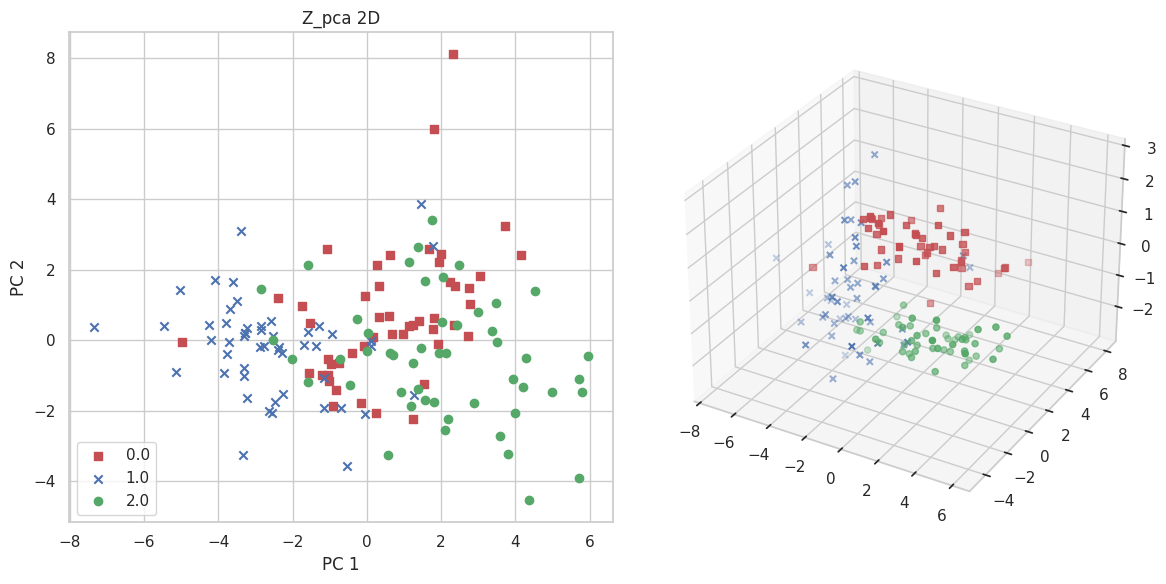

In [135]:
import os
import seaborn as sns
sns.set(style='whitegrid', context='notebook')

# import Axes3D for plottin 3d scatter
from mpl_toolkits.mplot3d import Axes3D

# calculate z_pca(2d and 3d)
Z_pca2 = Z.dot(W_2D)
Z_pca3 = Z.dot(W_3D)

# plot settings
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
fig = plt.figure(figsize=(12,6))

# plot 2D
plt2 = fig.add_subplot(1,2,1)
for l, c, m in zip(np.unique(Y_load), colors, markers):
    plt2.scatter(Z_pca2[Y_load==l, 0], 
                Z_pca2[Y_load==l, 1], 
                c=c, label=l, marker=m)

plt.title('Z_pca 2D')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()

# plot 3D
plt3 = fig.add_subplot(1,2,2, projection='3d')
# you should plot a 3D scatter using plt3.scatter here (see Axes3D.scatter in matplotlib)
for l, c, m in zip(np.unique(Y_load), colors, markers):
    plt3.scatter(Z_pca3[Y_load==l, 0], 
                 Z_pca3[Y_load==l, 1],  
                 Z_pca3[Y_load==l, 2],  
                 c=c, label=l, marker=m)


if not os.path.exists('./output'):
    os.makedirs('./output')
plt.savefig('./output/fig-pca-2-3-z.png', dpi=300)
plt.show()